# PROBLEM:

In an astronomical observation, researchers used 17 different bands of the spectrum to analyze
4 celestial objects. Using the PCA - Principal component analysis find out which of the 4 celestial
objects does not behave like a star.

In [1]:
import pandas as pd
df=pd.read_excel('PCA_exercise_1.xlsx', index_col=0)
df

,Object 1,Object 2,Object 3,Object 4
Band 1,375,135,458,475
Band 2,57,47,53,73
Band 3,245,267,242,227
Band 4,1472,1494,1462,1582
Band 5,105,66,103,103
Band 6,54,41,62,64
Band 7,193,209,184,235
Band 8,147,93,122,160
Band 9,1102,674,957,1137
Band 10,720,1033,566,874


## Importing Libraries

In [2]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import warnings
import numpy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999


We can see that each object is represented by 17 stars, so in order to see reduce the dimensionality and plot the object, we can use PCA.
We can use the PCA from sklearn library or create our PCA

### 1. First we need to standarize the data in order to use PCA

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
df_stars=df.T
sc = StandardScaler()
df_stars_std = sc.fit_transform(df_stars.values)

### 2. Then we calculate the PCA using the sklearn Library

In [4]:
# sklearn solution
pca = PCA(n_components=3)
df_stars_pca=pca.fit_transform(df_stars_std)

Variance Ratio:  [0.68 0.25 0.07]


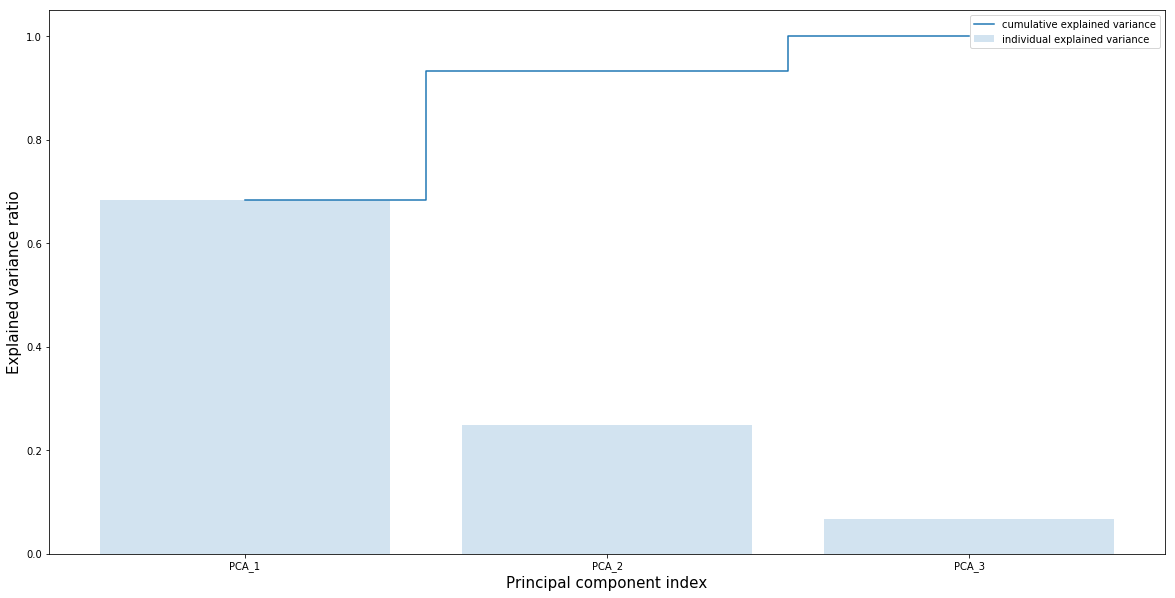

In [5]:
# plot explained variances
plt.figure(figsize=(20,10))
plt.bar(['PCA_'+str(i+1) for i in range(pca.n_components_)], pca.explained_variance_ratio_, alpha=0.2,
        align='center', label='individual explained variance')
plt.step(['PCA_'+str(i+1) for i in range(pca.n_components_)], np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio', fontsize=15)
plt.xlabel('Principal component index', fontsize=15)
plt.legend(loc='best',prop={'size': 10})
print('Variance Ratio: ', np.round(pca.explained_variance_ratio_,2))
plt.show()

We can see that the Two principal components PCA_1 and PCA_2 accumulate the 93% of the variance 

### 3. Which is not a Star?

One way to see it would be looking at the correlation matrix for the objects at the beggining

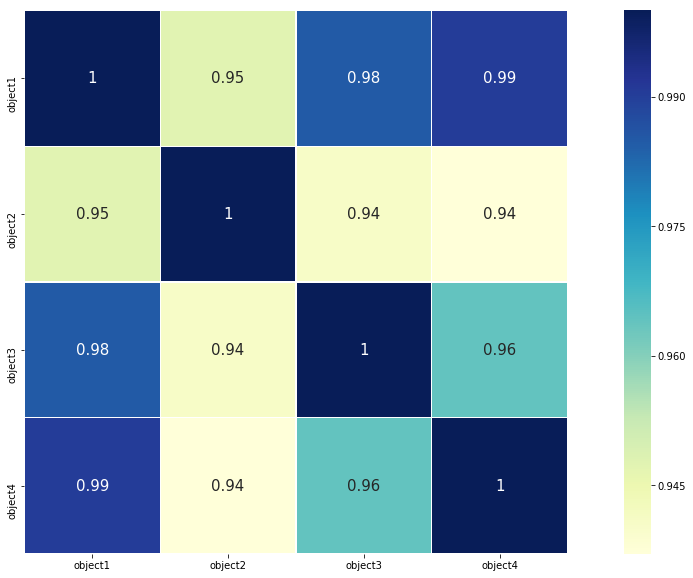

In [6]:
plt.figure(figsize=(20,10))
corrMatrix = np.corrcoef(df_stars)
names = ['object'+str(i+1) for i in range(0,4) ]
sns.heatmap(corrMatrix, vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, 
            annot=True, annot_kws={"fontsize":15}, xticklabels=names, yticklabels=names)  

plt.show()

The graphs shows that the less correlated Object would be Object 2 because the other 3 are the most correlated. Another way to visualize it would be using the PCA components and making a dimensionality reduction. Finally we can apply K-means in order to compare distances to the centroids. In that way we can create a 2 clusters a see which object doesn't behave like a star

### 4. Visualizing PCA and K-means

In [7]:
#Create the Objects dataframe with PCA components
list_pca=['PCA'+str(i) for i in range(1,pca.n_components_+1)]
dictionary=dict()
for i in range(len(list_pca)):
    dictionary[i]=list_pca[i]
objects=pd.DataFrame(df_stars_pca).rename(columns=dictionary)
objects['Num_Object']=['Object'+str(i+1) for i in range(4)]

In [8]:
objects

,PCA1,PCA2,PCA3,Num_Object
0,-0.954490,0.328318,1.829829,Object1
1,4.987462,-1.826611,-0.283270,Object2
2,0.487978,3.233672,-0.765148,Object3
3,-4.520951,-1.735380,-0.781412,Object4


Now that we have the Objects and its Principal components, We can apply a kmeans in order to separate the 
points in two clusters

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(objects[['PCA1','PCA2','PCA3']])
objects['Kmean'] = kmeans.predict(objects[['PCA1','PCA2','PCA3']])

In [10]:
#DataFrame Objects with their Clusters
objects

,PCA1,PCA2,PCA3,Num_Object,Kmean
0,-0.954490,0.328318,1.829829,Object1,0
1,4.987462,-1.826611,-0.283270,Object2,1
2,0.487978,3.233672,-0.765148,Object3,0
3,-4.520951,-1.735380,-0.781412,Object4,0


### 5. Finally We plot the points with coordinates PCA1 and PCA2

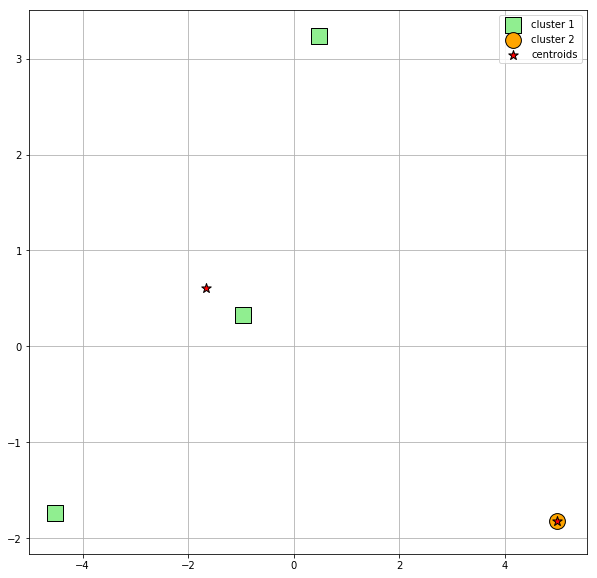

In [11]:
# plot the 3 clusters
plt.figure(figsize=(10,10))
plt.scatter(
    objects[objects['Kmean']==0]['PCA1'].values, objects[objects['Kmean']==0]['PCA2'].values,
    s=250, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    objects[objects['Kmean']==1]['PCA1'].values,objects[objects['Kmean']==1]['PCA2'].values,
    s=250, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=100, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### Conclusion
We see that the Object that doesn't behave like a star will be the element that has aproximate (4.5,-2) as coordinates.This element is the **Object2**